In [1]:
import numpy as np
import pandas as pd
from typing import Optional, List

import sklearn.base

seed = 24


In [2]:
!curl https://api.openml.org/data/get_csv/20649135/file2ed11cebe25.arff > data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1646k    0 1646k    0     0  1110k      0 --:--:--  0:00:01 --:--:-- 1110k


In [3]:
data = pd.read_csv('./data.csv')

data.sample(20)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
557,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,9079,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,7,2009,WD,Normal,122000,-93.675716,42.035289
346,Split_or_Multilevel,Residential_Low_Density,60,8400,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,Shed,490,6,2009,WD,Normal,189000,-93.636400,42.060896
893,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,50,9405,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,6,2009,WD,Normal,118000,-93.664779,42.022478
2495,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8020,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Good_Wood,NaN,0,4,2006,WD,Normal,124000,-93.669708,42.034570
2587,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,65,11050,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,7,2006,WD,Normal,133500,-93.613491,42.038602
1305,One_Story_1946_and_Newer_All_Styles,Residential_Medium_Density,103,12205,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,12,2008,WD,Abnorml,65000,-93.606802,42.031100
553,One_and_Half_Story_Unfinished_All_Ages,Residential_High_Density,60,9000,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,10,2009,WD,Normal,76000,-93.680198,42.035287
1884,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,70,7535,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Wood_Wire,Shed,480,6,2007,WD,Normal,120000,-93.621352,42.042577
636,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,70,8750,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Good_Wood,NaN,0,11,2009,COD,Abnorml,120000,-93.614768,42.042970
2295,Two_Story_1946_and_Newer,Residential_Low_Density,68,8286,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,Good_Privacy,NaN,0,6,2007,WD,Normal,157000,-93.604524,41.989488


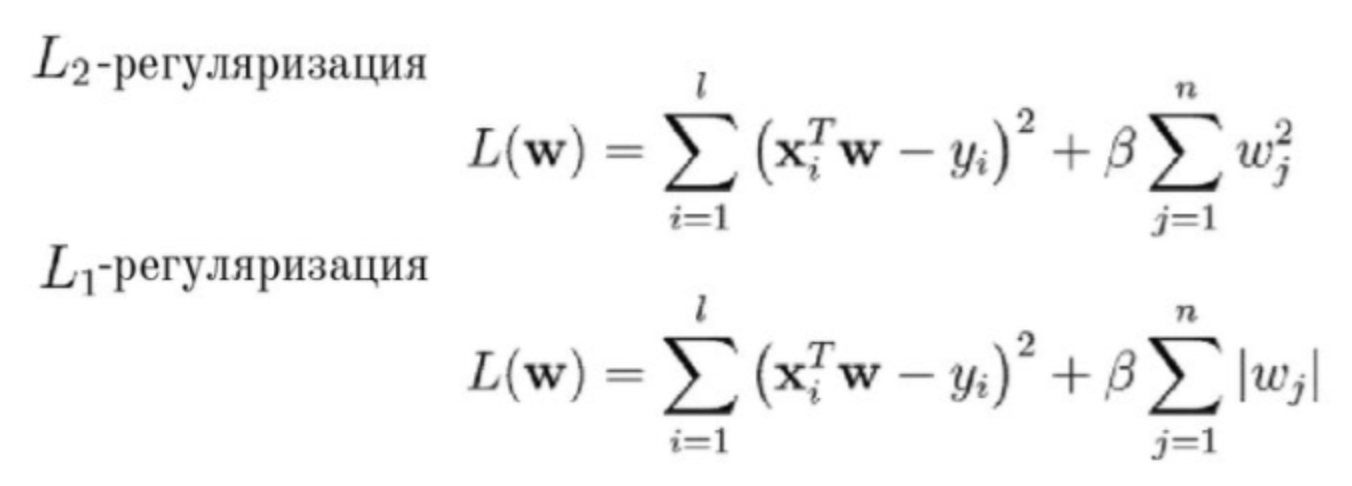
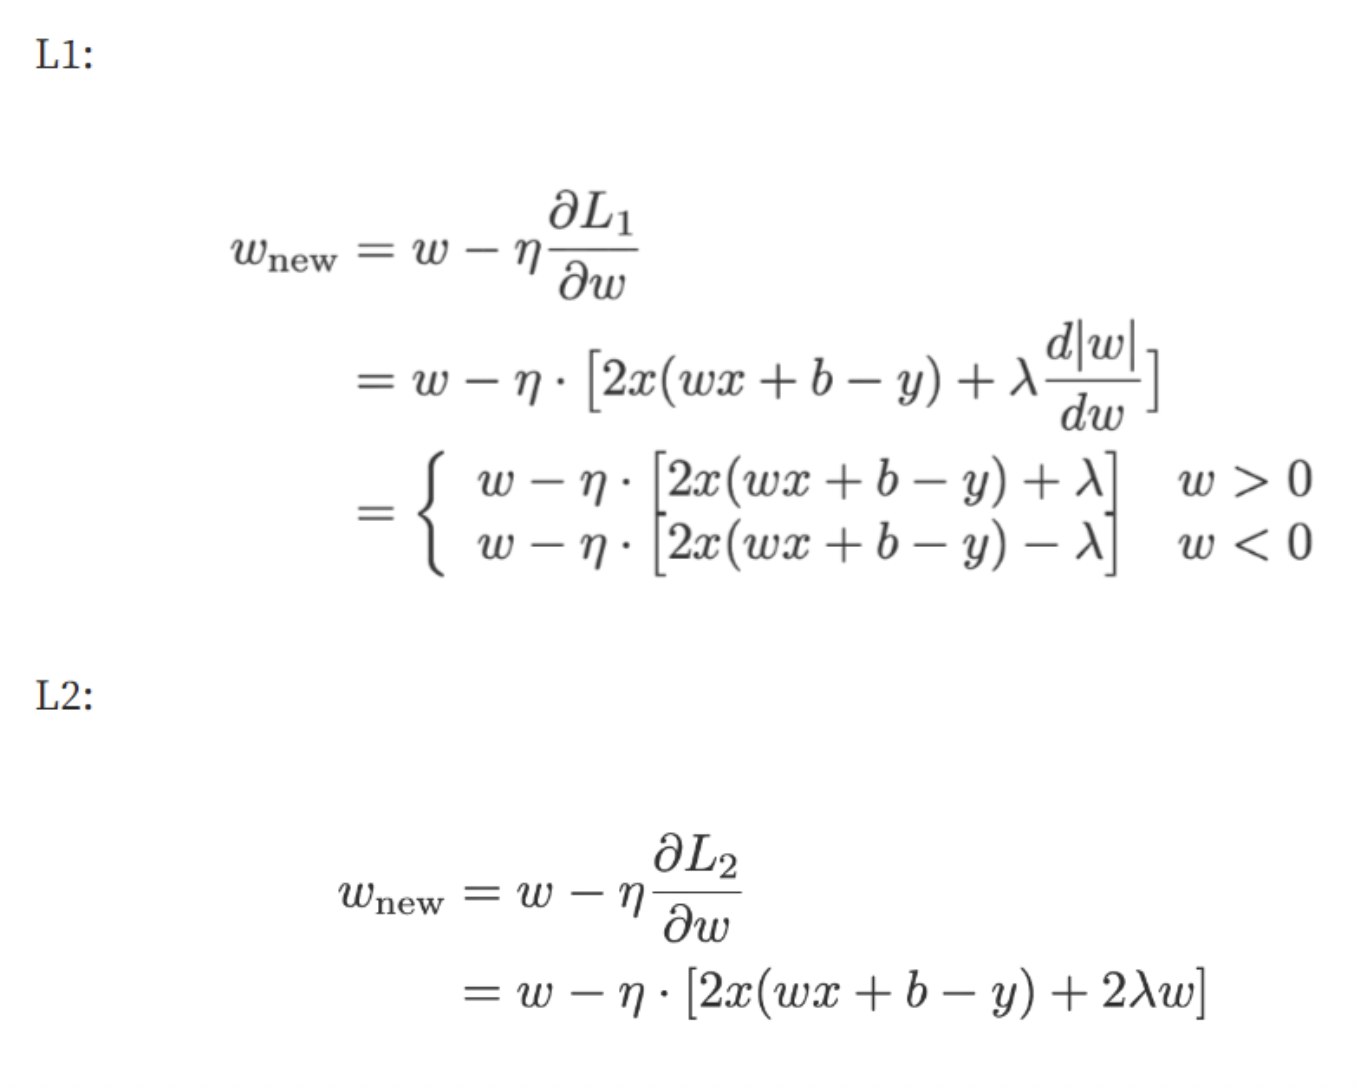
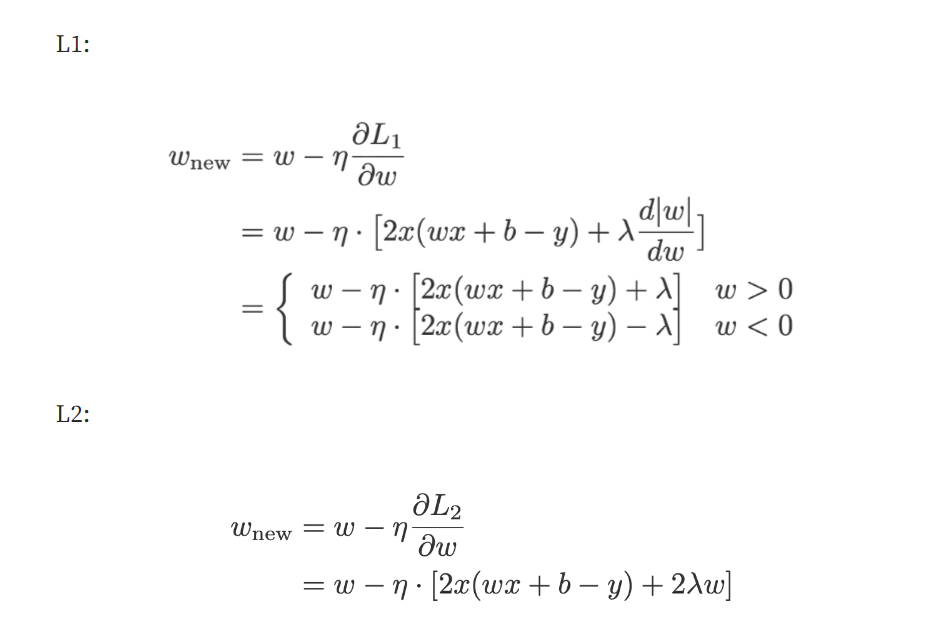
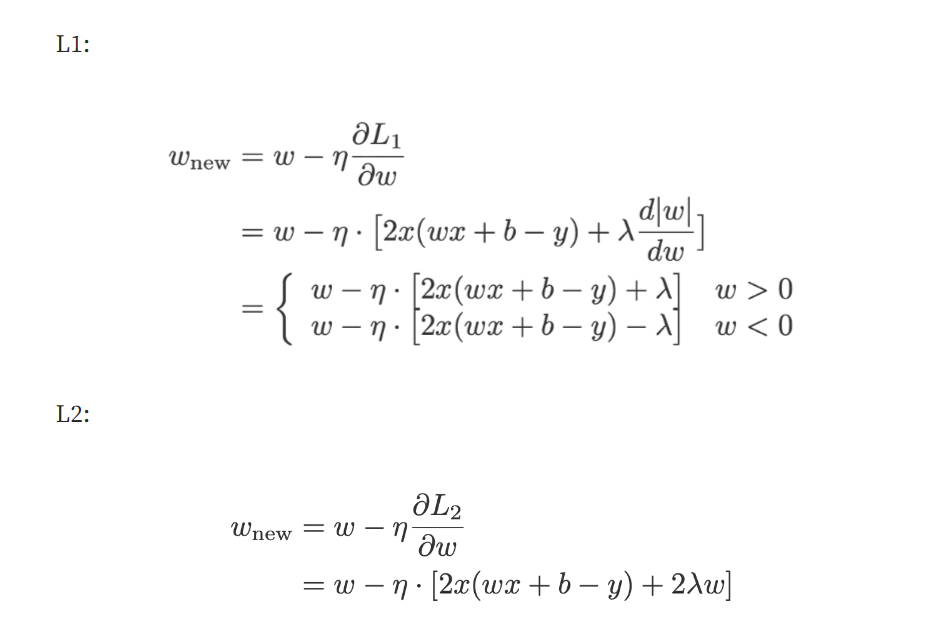
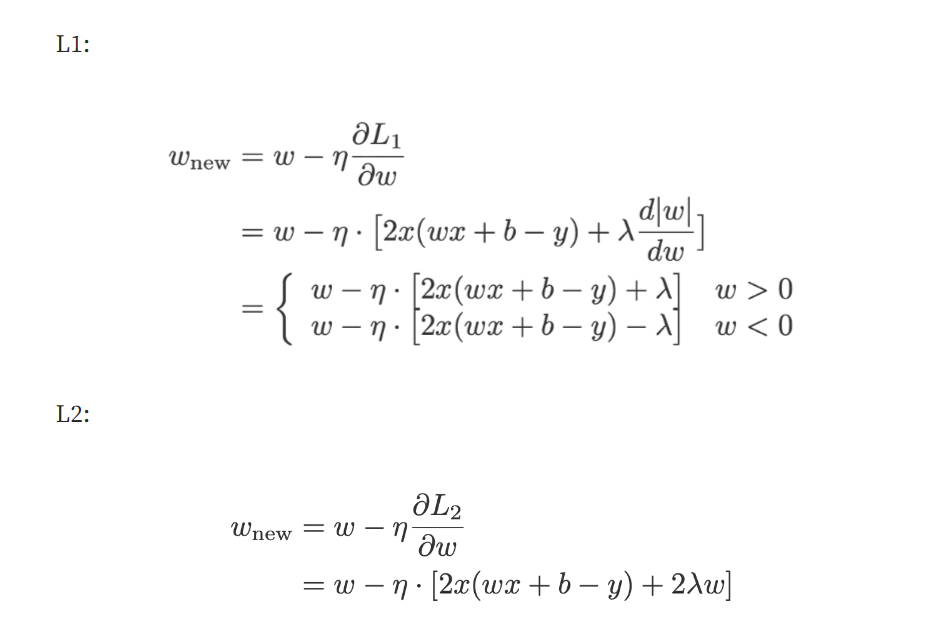
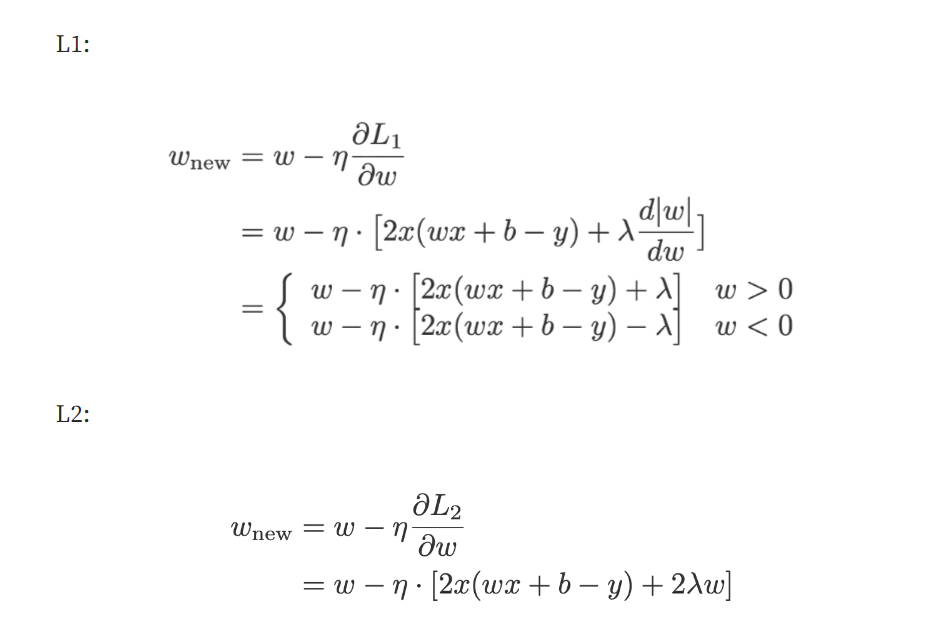

In [4]:
class MyLinearRegression():
    def __init__(self, lr = 0.01, n_iters=1000, penalty=None, lyambda = 0.5):
        self.lr = lr
        self.n_iters = n_iters
        self.penalty = penalty
        self.lyambda = lyambda
        self.weights = None
        self.bias = None
        #надо сохранять лосс
        self.loss = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # объявим веса как вектор нулей
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            # уравнение гиперплоскости
            y_pred = X @ self.weights + self.bias
            
            # вычисляем лосс и сохраняем его
            current_loss = self.compute_loss(y_pred, y)
            self.loss.append(current_loss)
            
            if self.penalty is None:
                gradient = (1 / n_samples) * X.T @ (y_pred - y)
            if self.penalty == 'L1':
                gradient = (1 / n_samples) * X.T @ (y_pred - y) + self.lyambda * np.sign(self.weights)
            if self.penalty == 'L2':
                gradient = (1 / n_samples) * X.T @ (y_pred - y) + 2 * self.lyambda * self.weights
        # производ по весам
            db = (1 / n_samples) * np.sum(y_pred - y)
        # шаг
            self.weights = self.weights - self.lr * gradient
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        return X @ self.weights + self.bias


    def compute_loss(self, y_pred, y):
        # mse
        mse = np.mean((y - y_pred)**2)

        if self.penalty == 'L1':
            penalty = self.lyambda * np.sum(abs(self.weights))
        elif self.penalty == 'L2':
            penalty = self.lyambda * np.sum(self.weights**2)
        else:
            penalty = 0
            
        total_loss = mse + penalty
        return total_loss

    

In [5]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
print(f"\nЧисленные колонки: {list(numerical_columns)}")
numerical_features = [col for col in numerical_columns if col != 'Sale_Price']


Численные колонки: ['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add', 'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Year_Sold', 'Sale_Price', 'Longitude', 'Latitude']


In [6]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(data[numerical_features])
y_scaled = scaler_y.fit_transform(data[['Sale_Price']]).flatten()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_scaled,
    test_size=0.2,
    random_state=42
)

print(f"Train: {X_train.shape} {y_train.shape}")
print(f"Test: {X_test.shape} {y_test.shape}")

Train: (2344, 34) (2344,)
Test: (586, 34) (586,)


In [10]:
# Создаем и обучаем модель
model = MyLinearRegression(lr = 0.001, n_iters=2000, penalty='L2', lyambda = 0.1)
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"\nКачество модели:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


Качество модели:
MSE: 0.25
RMSE: 0.50
